# Evaluate

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Exercises
Do your work for this exercise in a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
from pydataset import data
df = data("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
x = df[['total_bill']]
y = df[['tip']]
df2 = pd.concat([x,y], axis=1)
df2

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61
...,...,...
240,29.03,5.92
241,27.18,2.00
242,22.67,2.00
243,17.82,1.75


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
- Here is some sample code to get you started:

In [23]:
#baseline
df2['yhat_baseline'] = df2['tip'].mean()
df2

,total_bill,tip,yhat_baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822
...,...,...,...,...
240,29.03,5.92,2.998279,3.969131
241,27.18,2.00,2.998279,3.774836
242,22.67,2.00,2.998279,3.301175
243,17.82,1.75,2.998279,2.791807


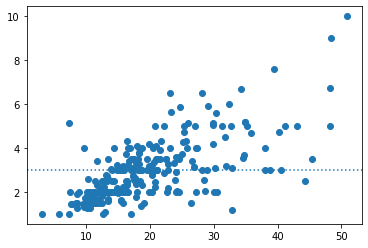

In [24]:
# plot data with baseline:
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')


In [21]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
model = ols('tip ~ total_bill', data=df).fit()

# compute predictions and add to original dataframe
predictions = model.predict(df.total_bill)


In [22]:
df2['yhat'] = predictions

In [25]:
df2.head()

,total_bill,tip,yhat_baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


#### The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

### 3. Plot the residuals for the linear regression model that you made.

In [27]:
df2['residual'] = df2.tip - df2.yhat
df2['baseline_residual'] = df2.tip - df2.yhat_baseline

In [29]:
df2

,total_bill,tip,yhat_baseline,yhat,residual,baseline_residual
1,16.99,1.01,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,2.998279,3.502822,0.107178,0.611721
...,...,...,...,...,...,...
240,29.03,5.92,2.998279,3.969131,1.950869,2.921721
241,27.18,2.00,2.998279,3.774836,-1.774836,-0.998279
242,22.67,2.00,2.998279,3.301175,-1.301175,-0.998279
243,17.82,1.75,2.998279,2.791807,-1.041807,-1.248279


In [31]:
# sum of residual is zero
df2.residual.sum()

2.2737367544323206e-13

In [32]:
# sum of baseline residual is zero too
df2.baseline_residual.sum()

-2.4868995751603507e-14

#### Sum of residual is zero for both model above so 'residuals' are not helpful in finding the line of best fit

### Residual Plots

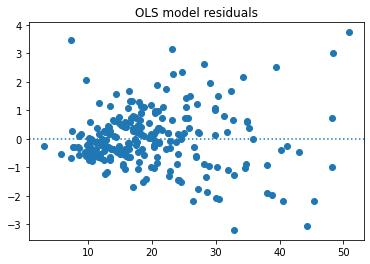

In [33]:
# Independent variable vs residual values
plt.scatter(df2.total_bill, df2.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');


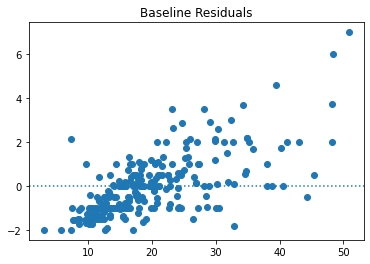

In [35]:
# dependent variable vs residual values
plt.scatter(df2.total_bill, df2.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');


### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

### 7. What is the amount of variance explained in your model?

### 8. Is your model significantly better than the baseline model?

### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.